**Data Exploration**

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
heart_data = pd.read_csv('/content/heart.csv')

In [3]:
# Display the first 5 rows
print(heart_data.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [4]:
# Summary statistics
print(heart_data.describe())

               Age    RestingBP  Cholesterol    FastingBS        MaxHR  \
count  1061.000000  1061.000000  1061.000000  1061.000000  1061.000000   
mean     53.691800   132.421301   202.864279     0.221489   137.774741   
std       9.365846    18.072879   105.159468     0.415445    25.285412   
min      28.000000     0.000000     0.000000     0.000000    60.000000   
25%      47.000000   120.000000   177.000000     0.000000   120.000000   
50%      55.000000   130.000000   222.000000     0.000000   140.000000   
75%      60.000000   140.000000   265.000000     0.000000   157.000000   
max      77.000000   200.000000   603.000000     1.000000   202.000000   

           Oldpeak  HeartDisease  
count  1061.000000   1061.000000  
mean      0.900848      0.555137  
std       1.097961      0.497185  
min      -2.600000      0.000000  
25%       0.000000      0.000000  
50%       0.500000      1.000000  
75%       1.500000      1.000000  
max       6.200000      1.000000  


In [5]:
# Data types
print(heart_data.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


**Handling Non-Numeric Data**

In [26]:
# Convert non-numeric columns to numeric
heart_data_numeric = heart_data.select_dtypes(include=['number'])

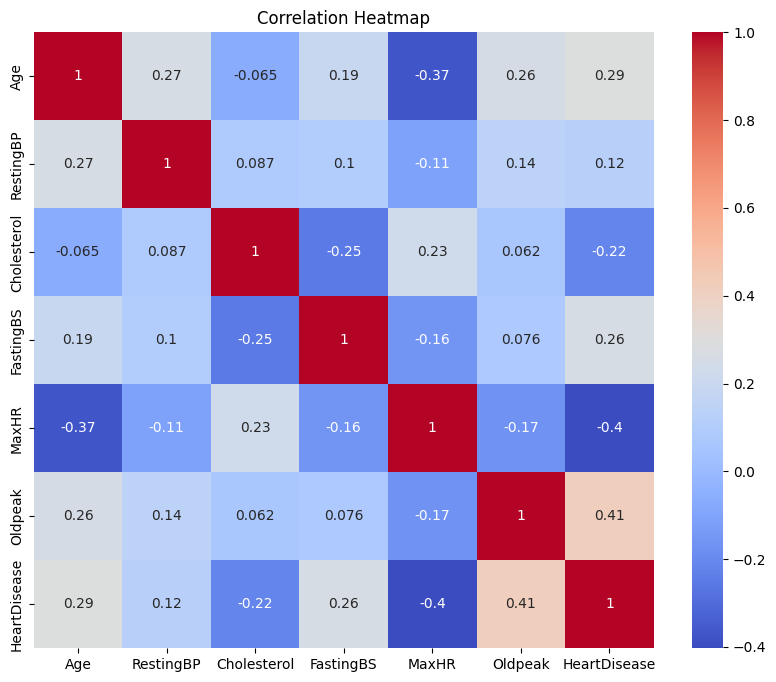

In [27]:
# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heart_data_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [34]:
import numpy as np

if 'Cholesterol' in heart_data.columns:
    data1 = heart_data.copy()  # Create a copy of the original DataFrame to avoid modifying it directly
    data1['log_Cholesterol'] = np.log1p(heart_data['Cholesterol'])
else:
    raise KeyError("'Cholesterol' column not found in 'heart_data' DataFrame")

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Plot Histograms

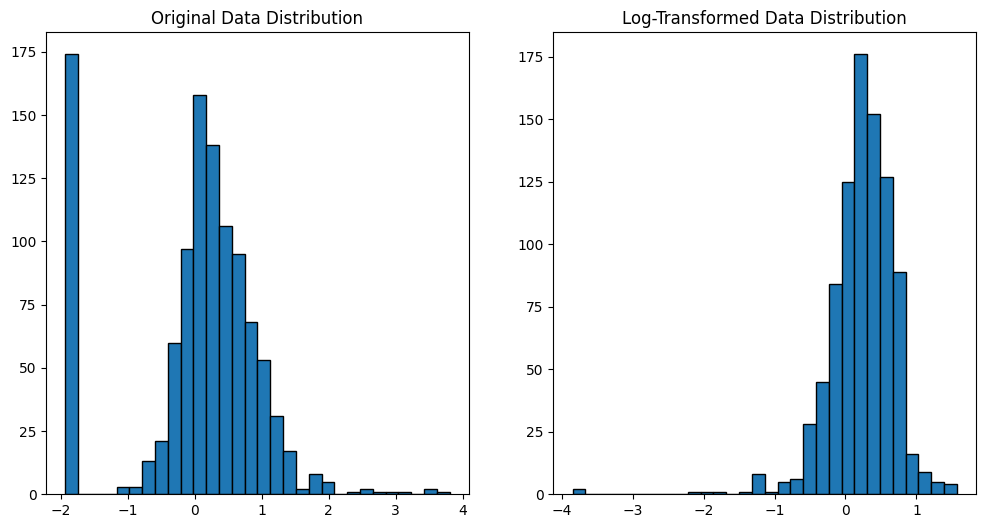

In [35]:
# Plot histograms of original and transformed data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(heart_data['Cholesterol'].dropna(), bins=30, edgecolor='black')
plt.title('Original Data Distribution')

plt.subplot(1, 2, 2)
plt.hist(data1['log_Cholesterol'].dropna(), bins=30, edgecolor='black')
plt.title('Log-Transformed Data Distribution')

plt.show()

**Data Preprocessing**

Handling Missing Values:

In [10]:
# Identify numeric and categorical columns
numeric_cols = heart_data.select_dtypes(include=['number']).columns
categorical_cols = heart_data.select_dtypes(exclude=['number']).columns

# Fill missing values for numeric columns with median
heart_data[numeric_cols] = heart_data[numeric_cols].fillna(heart_data[numeric_cols].median())

# Fill missing values for categorical columns with mode
for col in categorical_cols:
    mode_value = heart_data[col].mode()[0]  # Get the most frequent value (mode)
    heart_data[col].fillna(mode_value, inplace=True)

# Check again for missing values
print(heart_data.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Feature Engineering:

In [12]:
print(heart_data.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [13]:
# Normalize numerical columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_columns = ['Age', 'Cholesterol', 'RestingBP']
heart_data[numeric_columns] = scaler.fit_transform(heart_data[numeric_columns])

Dimensionality Reduction (PCA):

In [14]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(heart_data[numeric_columns])

**Data Mining**

Train-Test Split:

In [16]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = heart_data.drop('HeartDisease', axis=1)
y = heart_data['HeartDisease']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Model Training (Logistic Regression):

In [18]:
from sklearn.linear_model import LogisticRegression

# Convert categorical columns to numeric using one-hot encoding
heart_data_encoded = pd.get_dummies(heart_data, drop_first=True)  # Drop first to avoid dummy variable trap

# Separate features and target variable
X = heart_data_encoded.drop('HeartDisease', axis=1)
y = heart_data_encoded['HeartDisease']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize numerical columns
scaler = StandardScaler()
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


**Model Evaluation**

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 85.89%


In [20]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[111  21]
 [ 24 163]]


In [21]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       132
           1       0.89      0.87      0.88       187

    accuracy                           0.86       319
   macro avg       0.85      0.86      0.86       319
weighted avg       0.86      0.86      0.86       319



**Hyperparameter Tuning (Grid Search)**

In [22]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}

# Grid search
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 0.1, 'solver': 'liblinear'}


**Model Deployment (Exporting the Model)**

In [24]:
import joblib

# Save the trained model
joblib.dump(model, 'heart_disease_model.pkl')

['heart_disease_model.pkl']